In [5]:
from alphaengine import loaders, stats, transforms
import numpy as np
import talib as ta
from itertools import product
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
aapl = loaders.FileInstrument('../data/aapl.csv')

In [54]:
z_close = transforms.z_score(aapl['close'], window_size=50)

In [55]:
strats = transforms.generate_strategies(z_close)

In [56]:
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

/Users/stu/PycharmProjects/AlphaEngine/alphaengine/stats.py:117: RuntimeWarning: invalid value encountered in true_divide
  vol_effs = strat_v_bh / (np.sum(_strategy.astype(int), axis=1) / _strategy.shape[1])


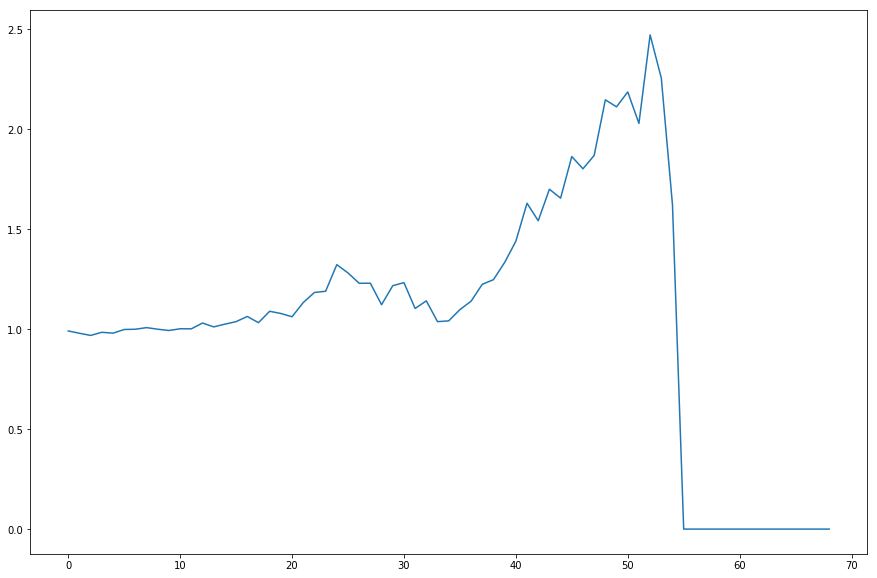

In [57]:
plt.plot(v)

In [58]:
best_strat = strats[np.argmax(v)]

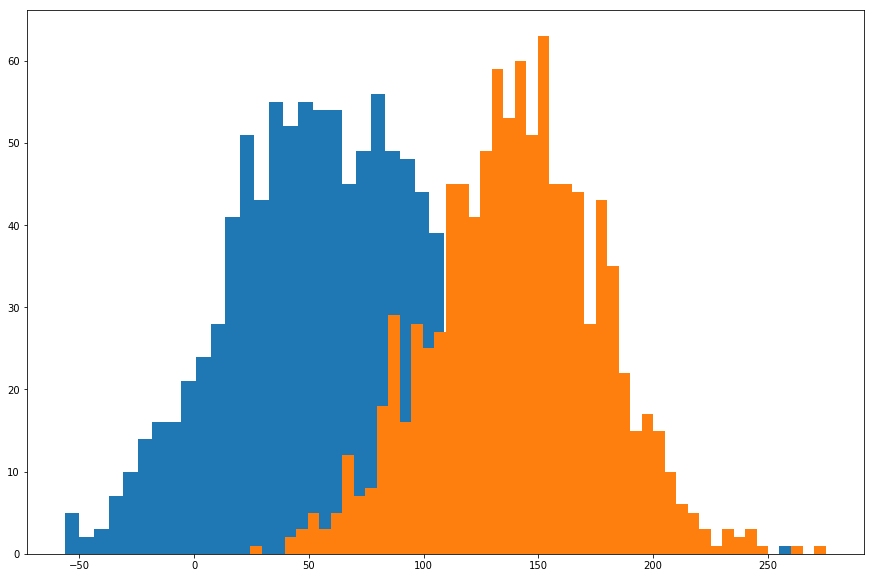

In [59]:
stats.plot_strat_monte_carlo(aapl, best_strat)

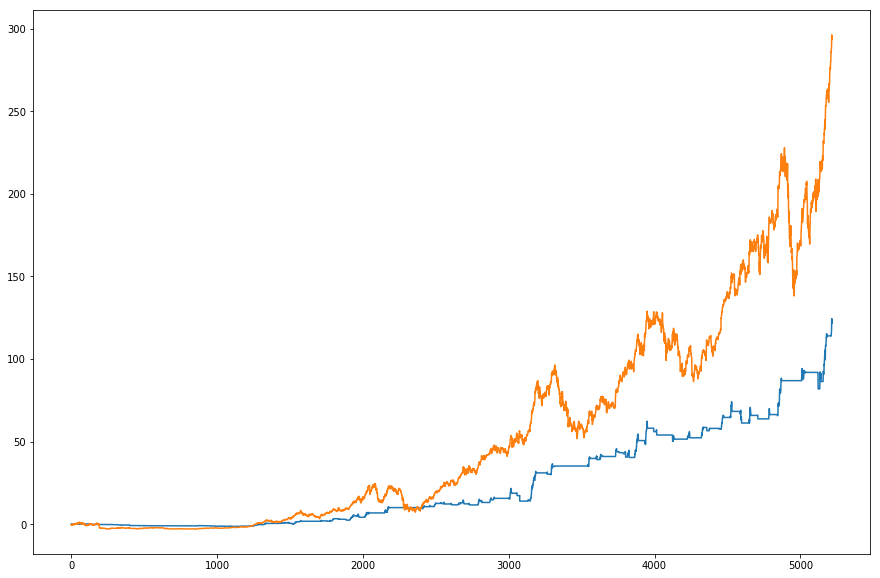

In [60]:
performance = best_strat.astype(int) * aapl['forward_returns']
plt.plot(np.cumsum(performance))
plt.plot(np.cumsum(aapl['forward_returns']))

In [61]:
a, b, c = ta.MACD(aapl['close'])

In [64]:
transforms.z_score(c, window_size=50)
strats = transforms.generate_strategies(z_close)
v = stats.vectorized_volatility_efficiency(aapl['forward_returns'], strats)

/Users/stu/PycharmProjects/AlphaEngine/alphaengine/stats.py:117: RuntimeWarning: invalid value encountered in true_divide
  vol_effs = strat_v_bh / (np.sum(_strategy.astype(int), axis=1) / _strategy.shape[1])


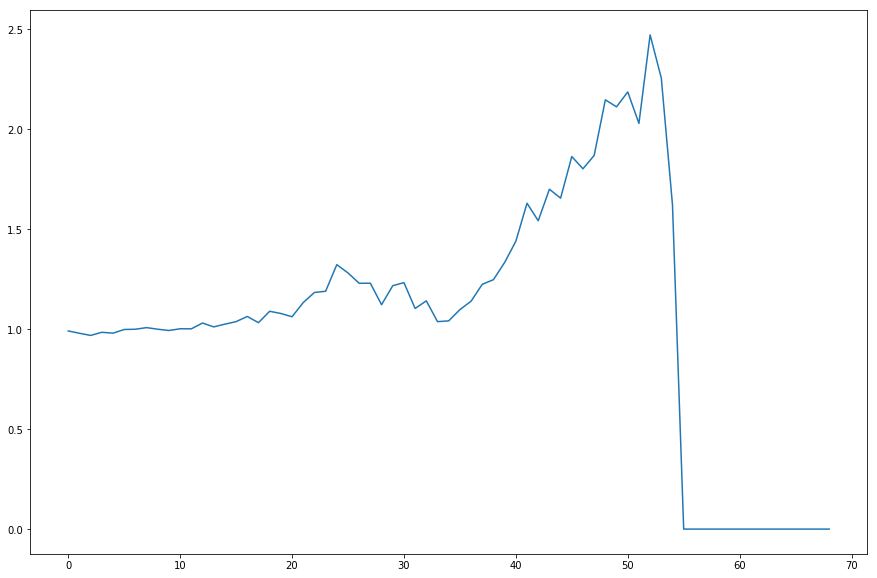

In [65]:
plt.plot(v)

In [66]:
def explore_feature(feature, returns, window_size=50):
    z = transforms.z_score(feature, window_size=window_size)
    strats = transforms.generate_strategies(z)
    v = stats.vectorized_volatility_efficiency(returns, strats)
    return v, strats